# Rainfall Weather Forecasting project 

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


From above we see that there are total of 8425 rows and 23 columns from which our target columns will be RainTomorrow (classification problem) and Rainfall (regression problem) .

# EDA

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

From above details we see that there are null values present in the dataset and thus we will be treating them with mode for object type data columns and mean for int/float datatypes, we will also be converting the date column into date, month and year

In [4]:
df.duplicated().sum()


1663

In [5]:
df.drop_duplicates(inplace=True)


Now we will convert the date columns into three seperate columns namely day, month, year



In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [7]:
for column in df.columns:

        print(df[column].value_counts())
        print('_______________________________________________')

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
_______________________________________________
13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64
_______________________________________________
19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
_______________________________________________
0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
_______________________________________________
4.0    

From above we can see all the values present in the object columns and their frequency.



# filling null values 

In [8]:
#replacing null value
df['WindGustDir'].fillna("N",inplace=True)
df['WindDir9am'].fillna("N",inplace=True)
df['WindDir3pm'].fillna("SE",inplace=True)
df['RainToday'].fillna("No",inplace=True)
df['RainTomorrow'].fillna("No",inplace=True)

In [9]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(),inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(),inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
MinTemp,6762.0,13.109145,5.540667,-2.0,9.000000,13.109145,17.400000,28.5
MaxTemp,6762.0,24.098345,6.130123,8.2,19.600000,23.500000,28.400000,45.5
Rainfall,6762.0,2.780148,10.482769,0.0,0.000000,0.000000,1.200000,371.0
Evaporation,6762.0,5.302395,3.343713,0.0,4.000000,5.302395,5.302395,145.0
Sunshine,6762.0,7.890896,2.733639,0.0,7.890896,7.890896,9.200000,13.9
WindGustSpeed,6762.0,38.977663,13.376457,7.0,30.000000,38.977663,46.000000,107.0
WindSpeed9am,6762.0,12.782206,9.787577,0.0,6.000000,11.000000,19.000000,63.0
WindSpeed3pm,6762.0,17.571150,9.548634,0.0,11.000000,17.000000,24.000000,83.0
Humidity9am,6762.0,67.506559,17.182700,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,6762.0,50.467147,18.498341,6.0,38.000000,50.000000,62.000000,99.0


From the above details we can notice the following-

Range,Mean and Standard deviation of each column
There maybe some outliers present as 75 % values and max vaues have considerable differences in some columns.
Skewness present in some columns as mean and median (50%) values are different for some columns.

In [12]:
df.describe(include='object')


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,6762,6762,6762,6762,6762,6762
unique,12,16,16,16,2,2
top,PerthAirport,N,N,SE,No,No
freq,1204,1401,1403,971,5190,5190


From above desribe function we are describing the data from all the object type columns and we notice the following-


Unique values in each columns
Most frequent value in each column. (mode)
Frequency of the most occuring value.

#  Data Visualisation

In [13]:
float_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='float':
        float_cols.append(i)
    
obj_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]!='float' :
        obj_cols.append(x)

print('float columns are=',float_cols,'\n')
print('Object columns are=',obj_cols)

float columns are= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

Object columns are= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']


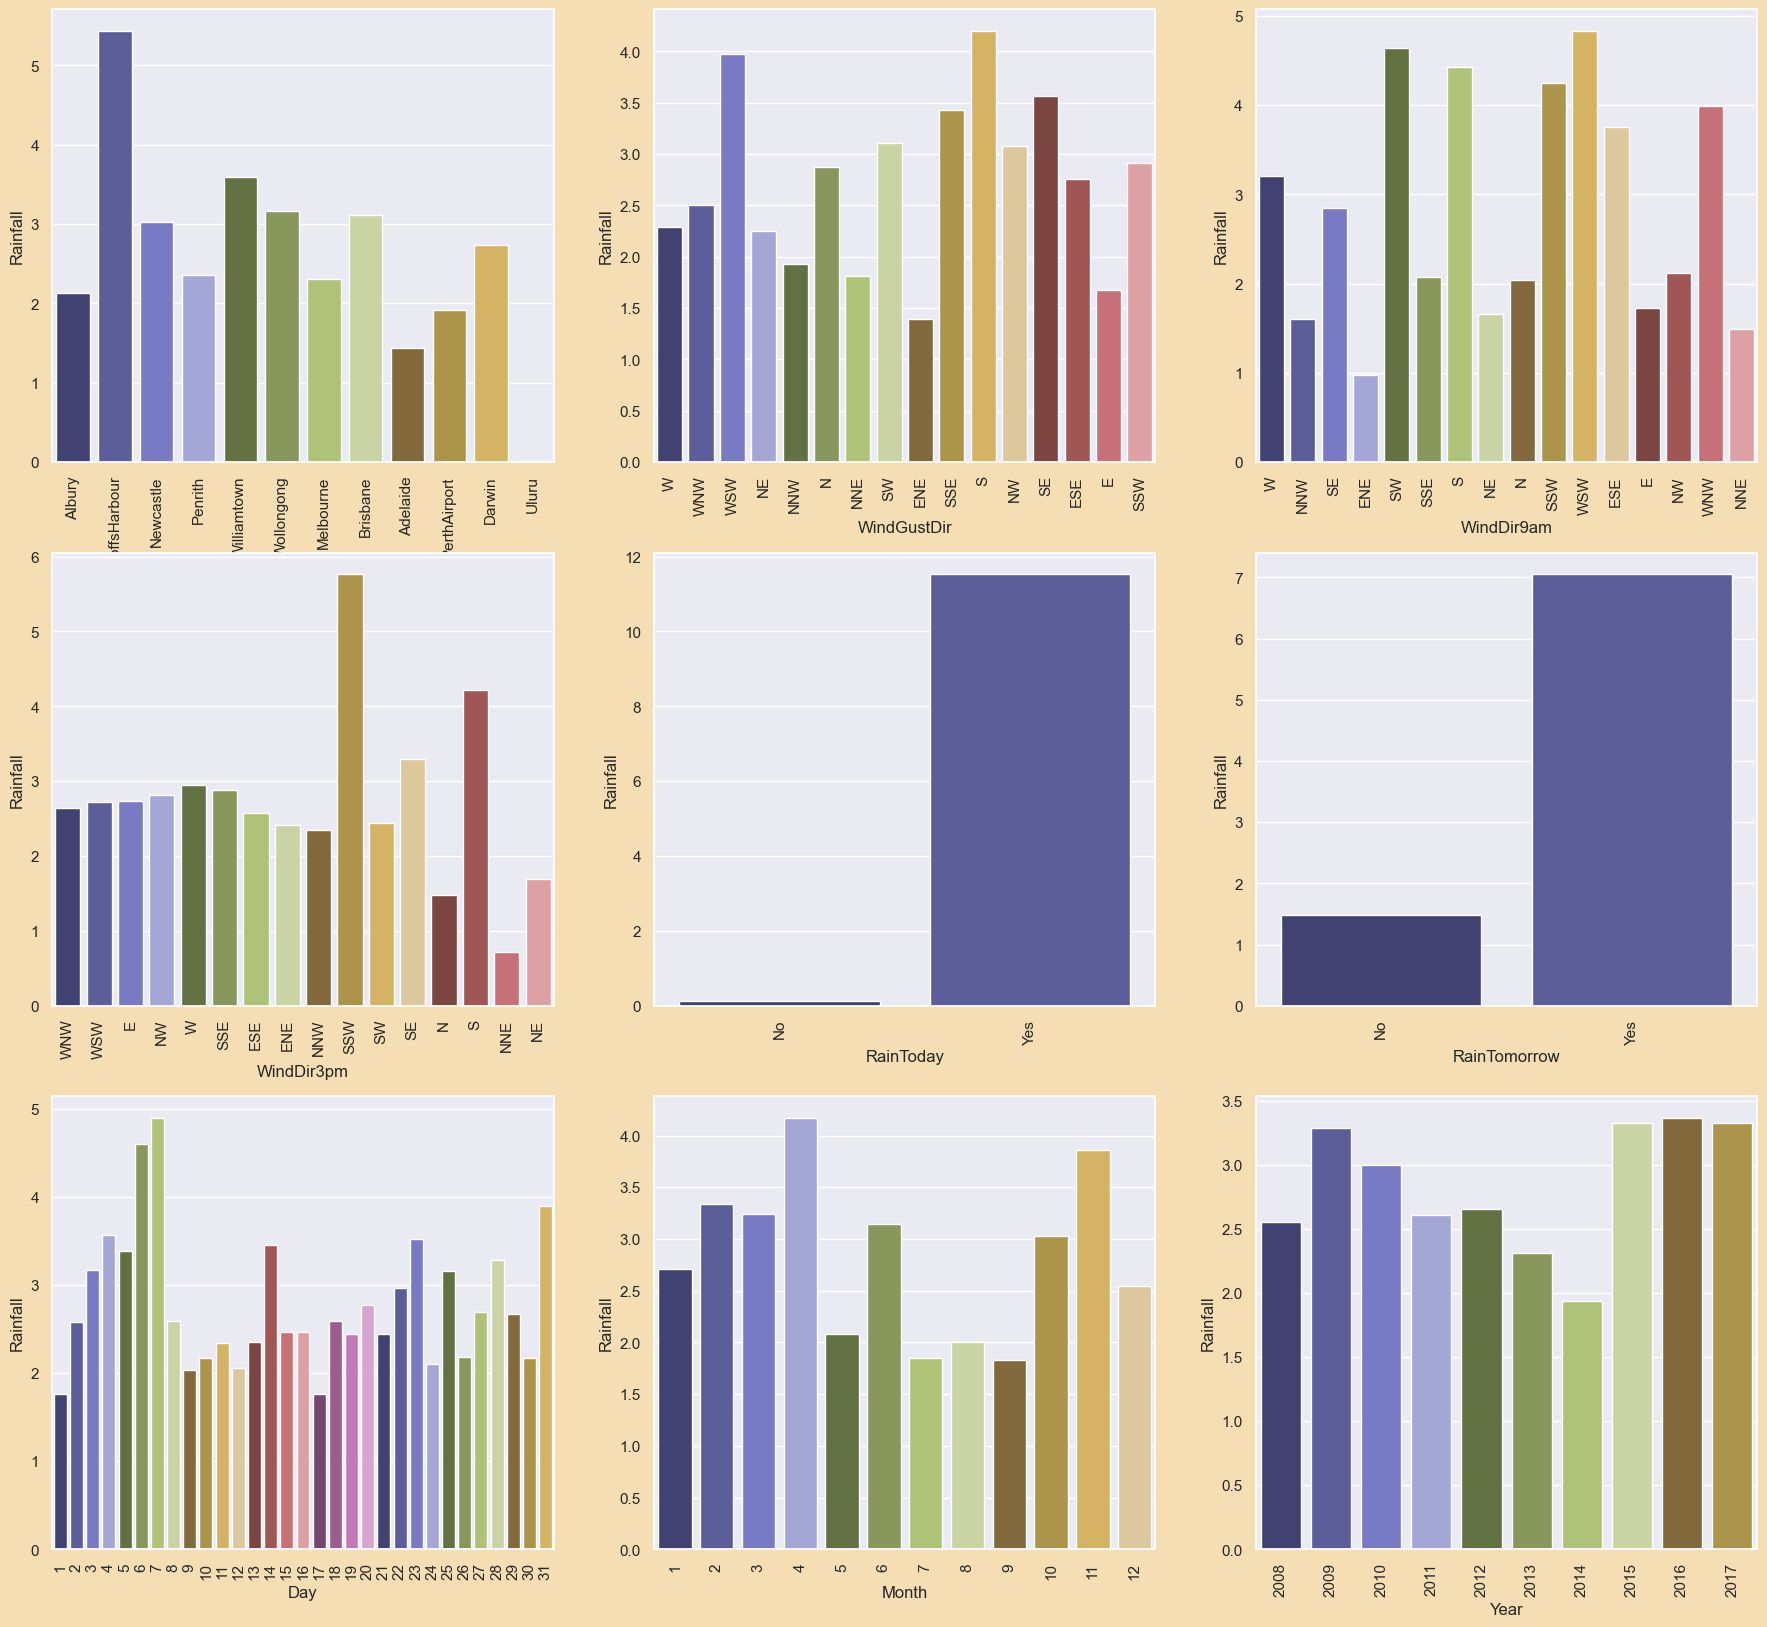

In [14]:


sb.set_style('darkgrid')
sb.set(font_scale=1)
pt.figure(facecolor='wheat', figsize=(22, 20))
p = 1
for i in obj_cols:
    if p <= 9:
        ax = pt.subplot(3, 3, p)
        sb.barplot(x=df[i], palette='tab20b', y='Rainfall', data=df, ci=None)  # Use ci instead of errorbar
        pt.xticks(rotation=90)
    p += 1
pt.show()


From above bar plots we can see how rainfall (in cms) is distributed among each value present in different object datatype columns.



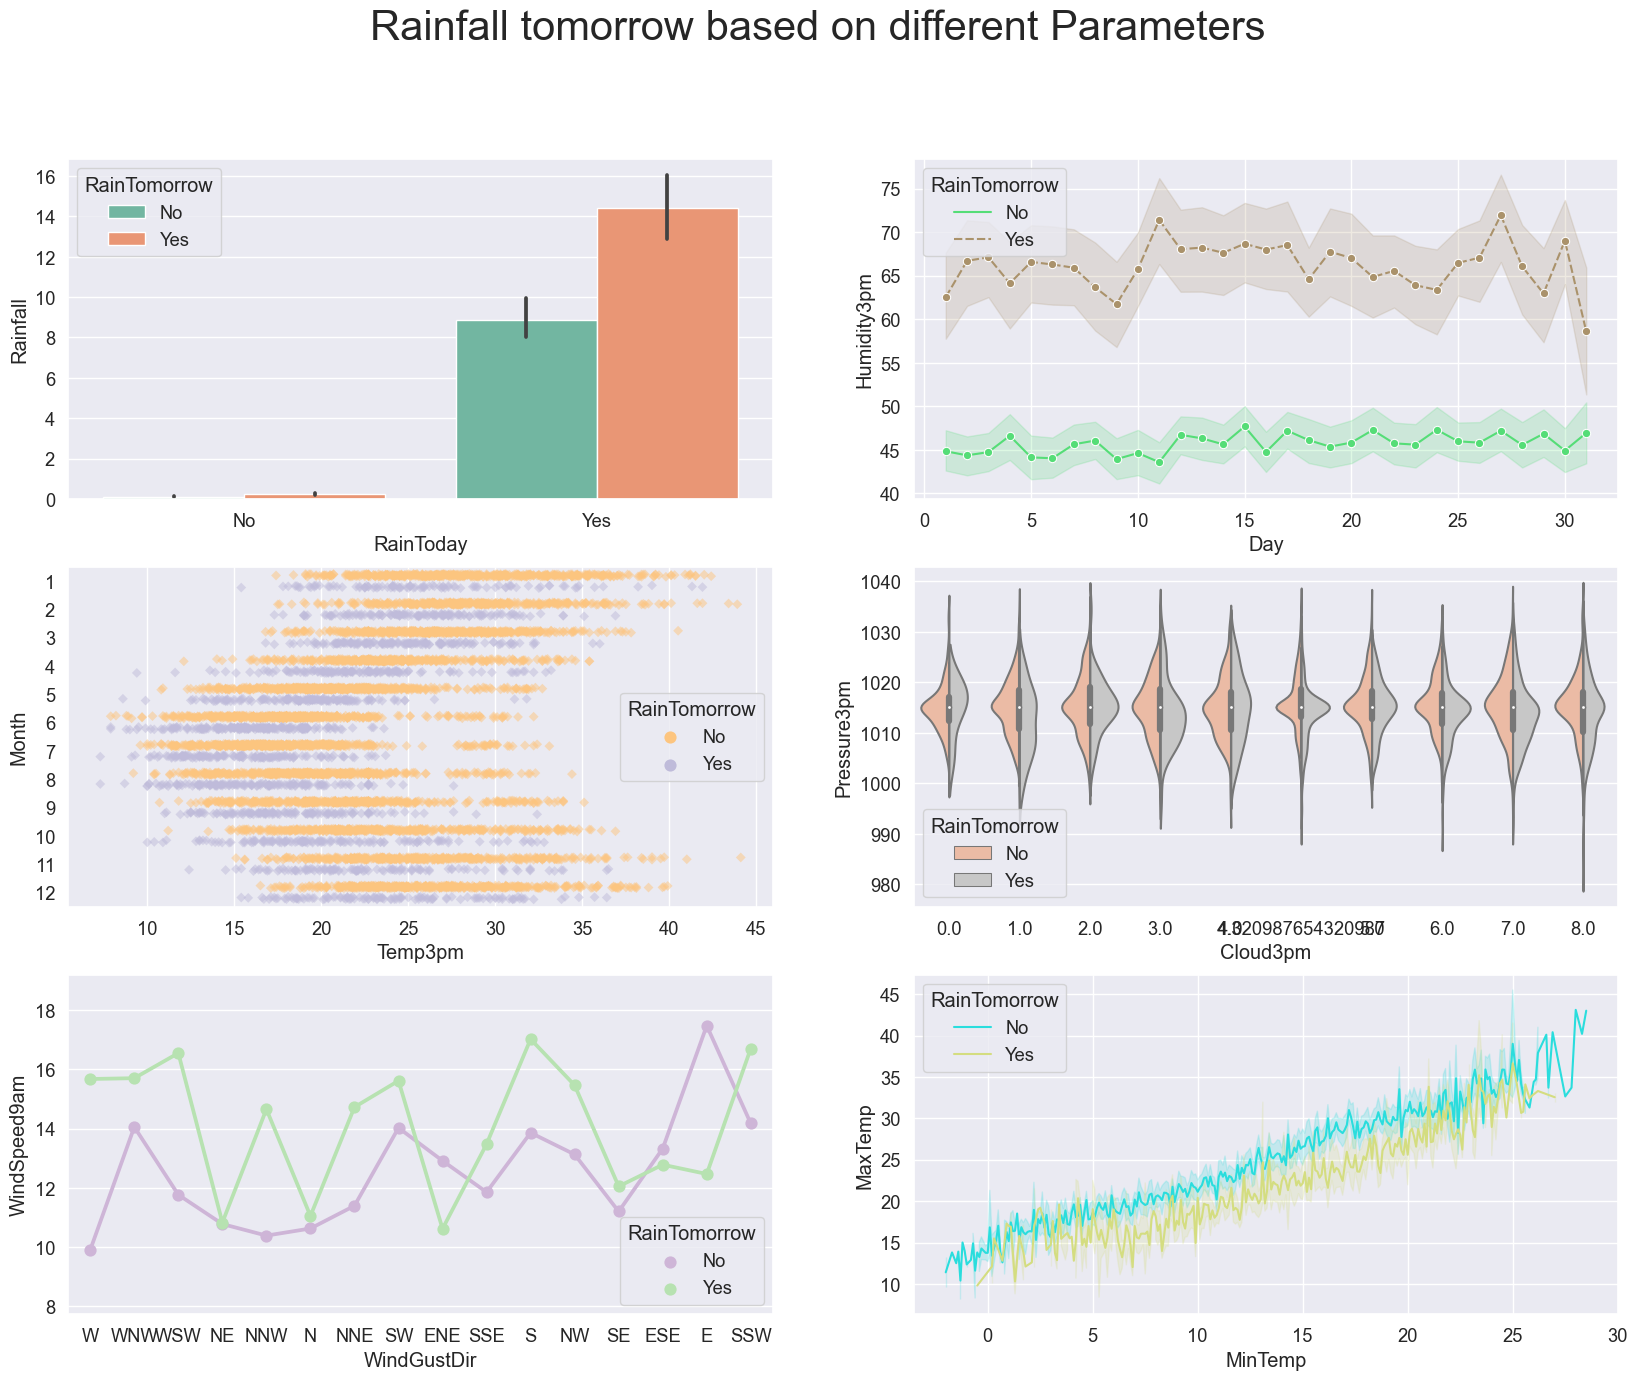

In [15]:
sb.set(font_scale=1.2)
fig, axes = pt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Rainfall tomorrow based on different Parameters', fontsize=30)

sb.barplot(ax=axes[0, 0], x='RainToday', y='Rainfall', hue='RainTomorrow', data=df, palette="Set2")
sb.lineplot(ax=axes[0, 1], x='Day', y='Humidity3pm', hue='RainTomorrow', style='RainTomorrow', marker='o', data=df, palette="terrain")

sb.stripplot(ax=axes[1, 0], y='Month', x='Temp3pm', hue='RainTomorrow', data=df, palette="PuOr", orient='h', marker='D', alpha=.5, dodge=True)

sb.violinplot(ax=axes[1, 1], x='Cloud3pm', y='Pressure3pm', hue='RainTomorrow', data=df, palette="RdGy", split=True)

sb.pointplot(ax=axes[2, 0], y='WindSpeed9am', x='WindGustDir', hue='RainTomorrow', data=df, palette="PRGn", errwidth=0)

sb.lineplot(ax=axes[2, 1], x='MinTemp', y='MaxTemp', hue='RainTomorrow', data=df, palette='rainbow')

pt.show()


As the RainTomorrow columns will be our target variable so we have made graphs with RainTomorrow as hue to understand the target in a better way. Following are our observations-

Whenever it rains today, there is a high probability of raining tomorrow as well.
Rain tomorrow generally happens when there is a humidity of more than 55 units recorded at 3pm.
Rain tomorrow is directly related to temperature at 3pm as chance of raining tomorrow increases as the temperature increases.
Pressure at 3pm mostly ranges around 1000-1300 units
Cances of rain tomorrow increases whenever there is more wind speed, whatever be the wind direction.

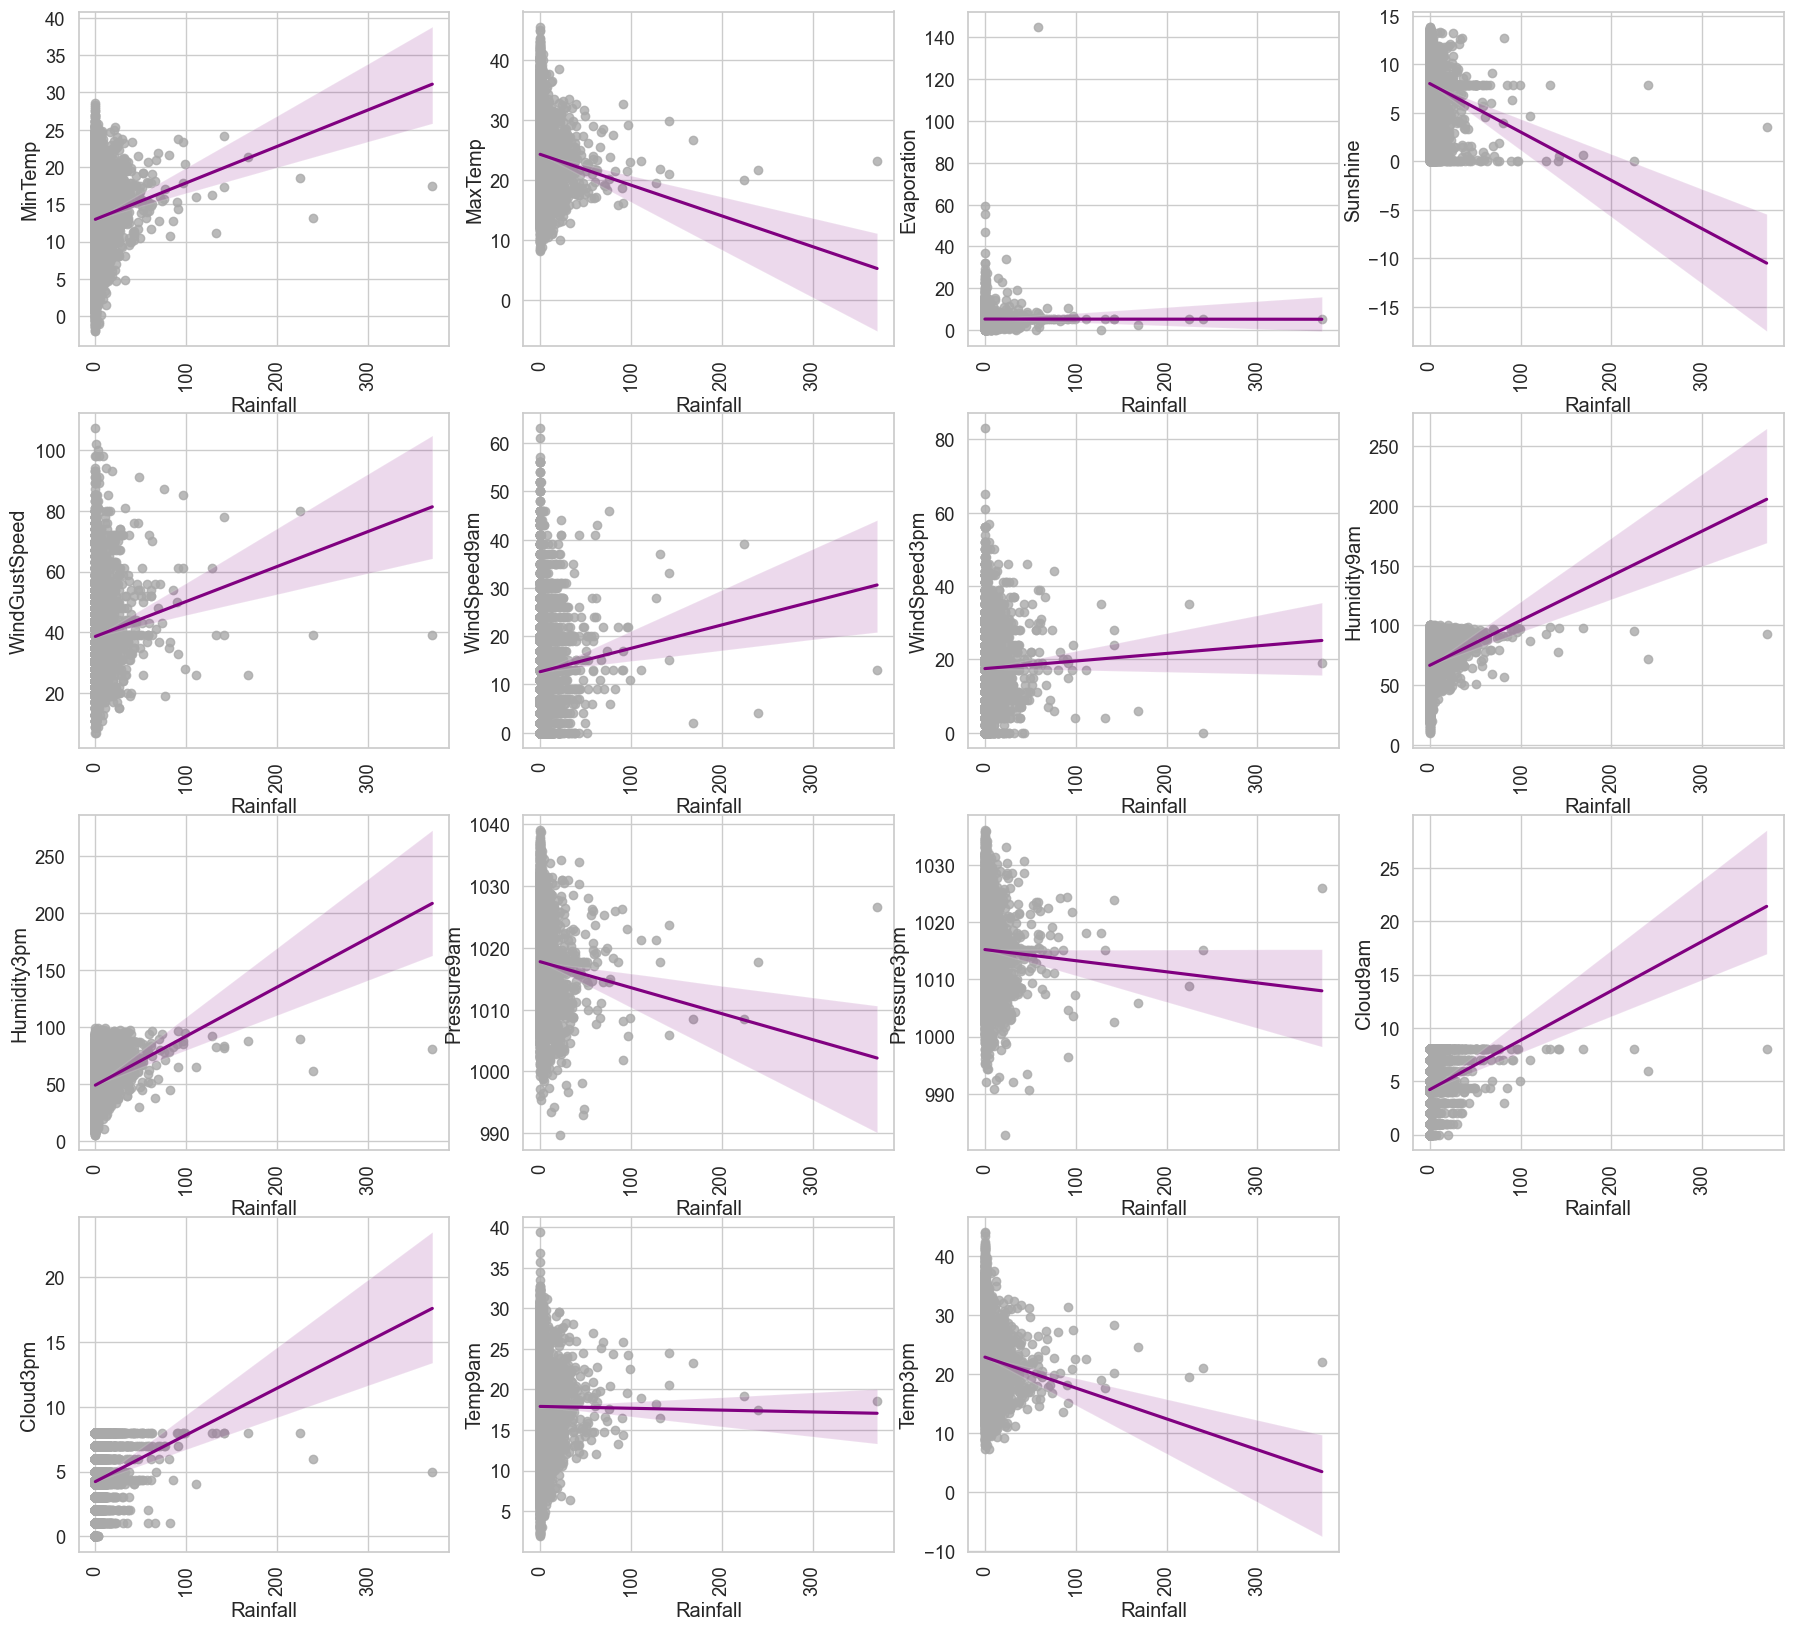

In [16]:
sb.set_style('whitegrid')
pt.figure(figsize=(22,20))
p=1
for i in float_cols:
    if p<=16:
        if i=='Rainfall':
            continue
        ax=pt.subplot(4,4,p)
        sb.regplot(y=df[i],x='Rainfall',color='darkgrey',data=df,line_kws=dict(color='purple'))
        pt.xticks(rotation=90)
    p+=1

Plotted regression graphs for rainfall with every float column to determine the relation.



# Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()
oe=OrdinalEncoder()

In [18]:
#encoding target column
df['RainTomorrow']=le.fit_transform(df['RainTomorrow']) 

#encoding independent variables
for i in obj_cols: 
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

# Heatmap to find correlation between each column


<AxesSubplot:>

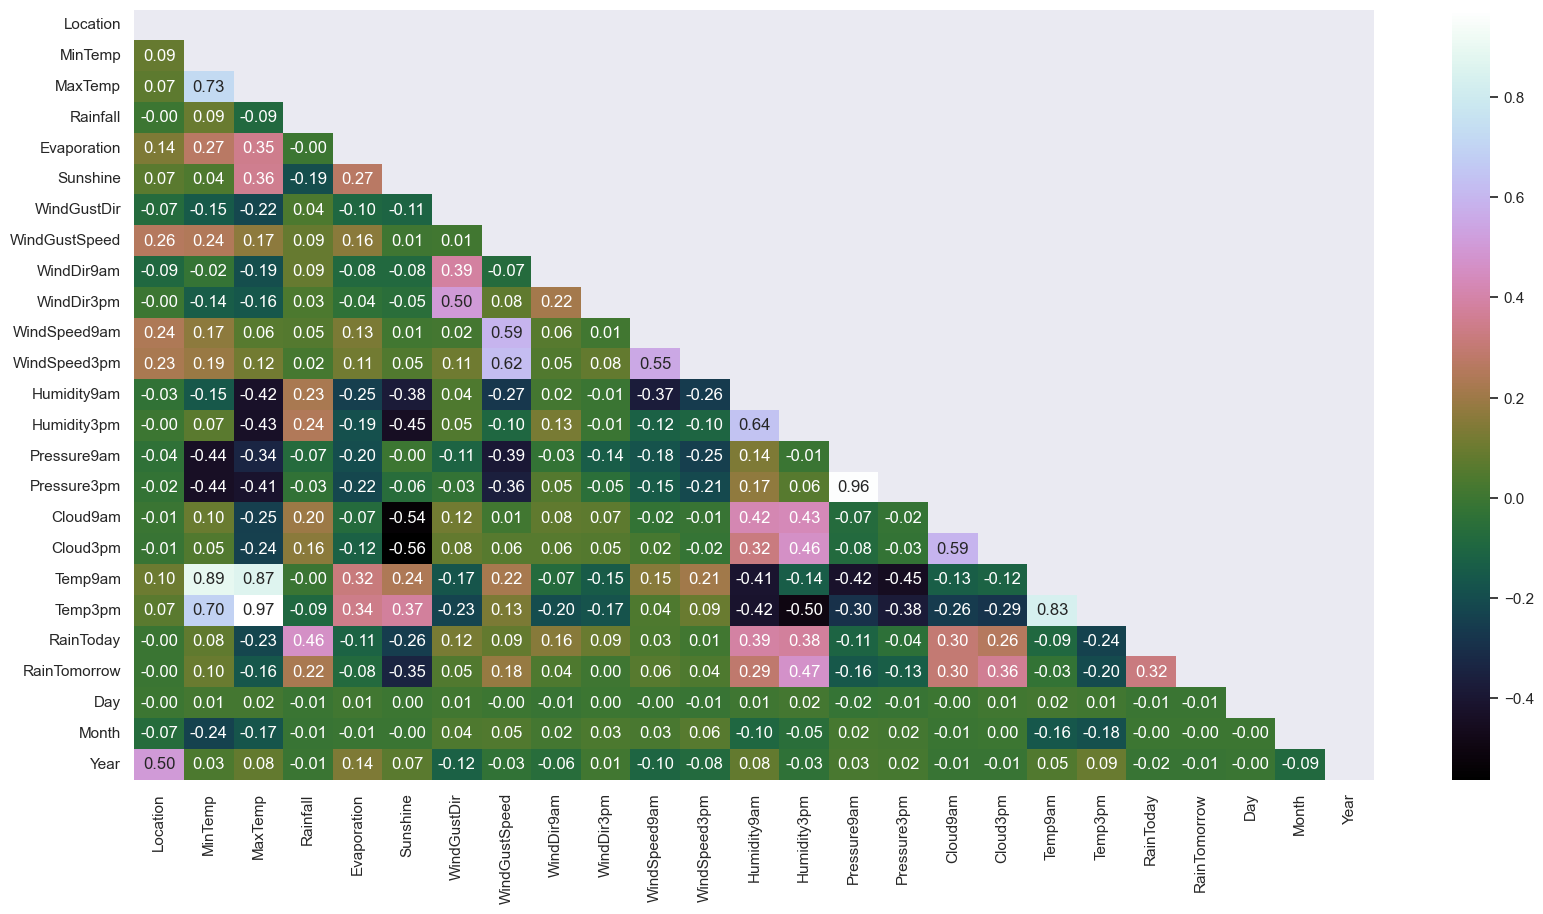

In [19]:
pt.figure(figsize=(20,10))
sb.set(font_scale=1)
sb.heatmap(df.corr(),mask=np.triu(df.corr()),annot=True,cmap='cubehelix',fmt=".2f")

We will be removing the location, month,day and year column as they have negligible correlation with RainTomorrow or even with rainfall,the two target variables in our problem statement.

In [20]:
df.drop(['Location','Day','Month','Year'],axis=1,inplace=True)


# Removing outliers using boxplot and zscore


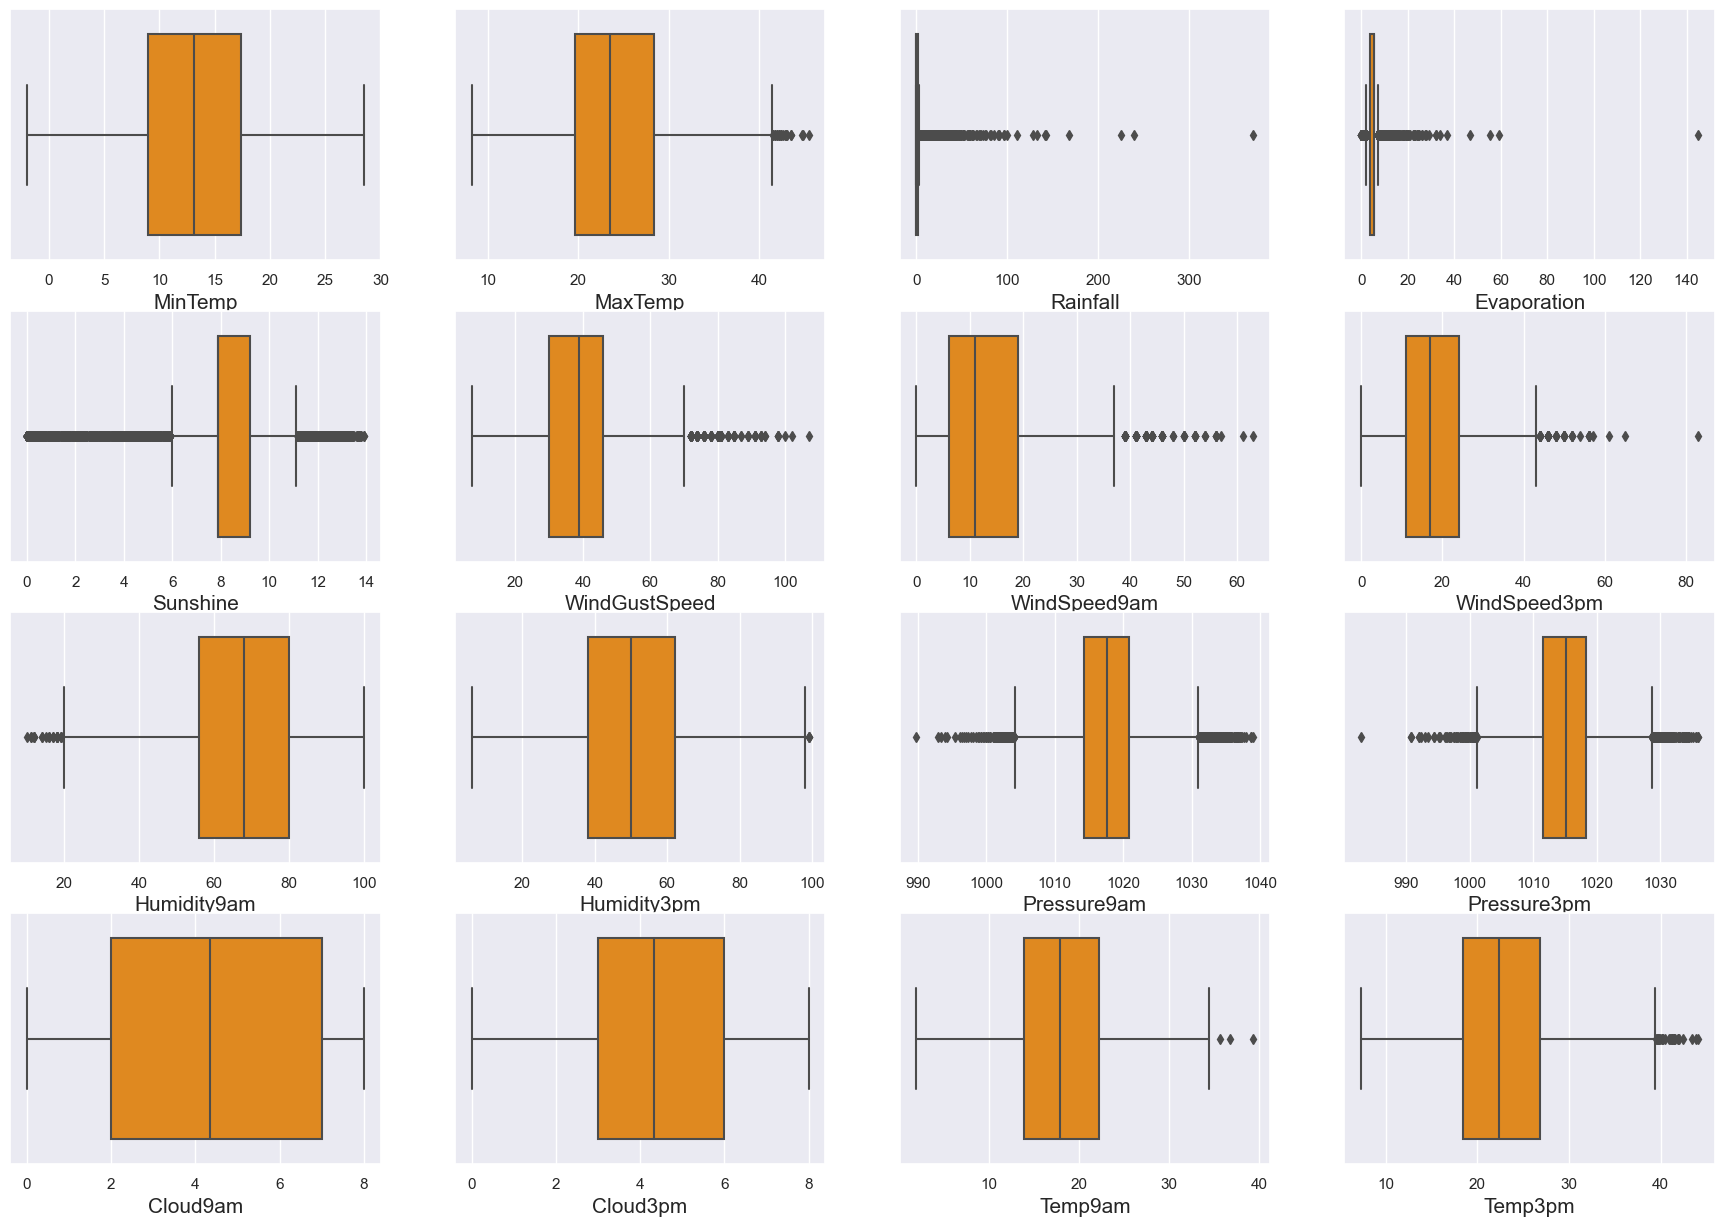

In [21]:
pt.figure(figsize=(22,15))
p=1
for i in float_cols:
    if p<=16:
        ax=pt.subplot(4,4,p)
        sb.boxplot(df[i],color='darkorange')
        pt.xlabel(i,fontsize=15)
    p+=1
pt.show()


From above we can confirm that there are many outliers present in the data



In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
thershold=3
df1=df[(z<3).all(axis=1)]
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (6762, 21)
Shape of the dataframe after removing outliers:  (6409, 21)
Percentage of data loss post outlier removal:  5.220349009168885


Shape of the dataframe before removing outliers:  (6762, 21)
Shape of the dataframe after removing outliers:  (6409, 21)
Percentage of data loss post outlier removal:  5.220349009168885


5.2% of data loss is acceptable, so we will continue with this data.

# Checking and removing skewness using log transformation


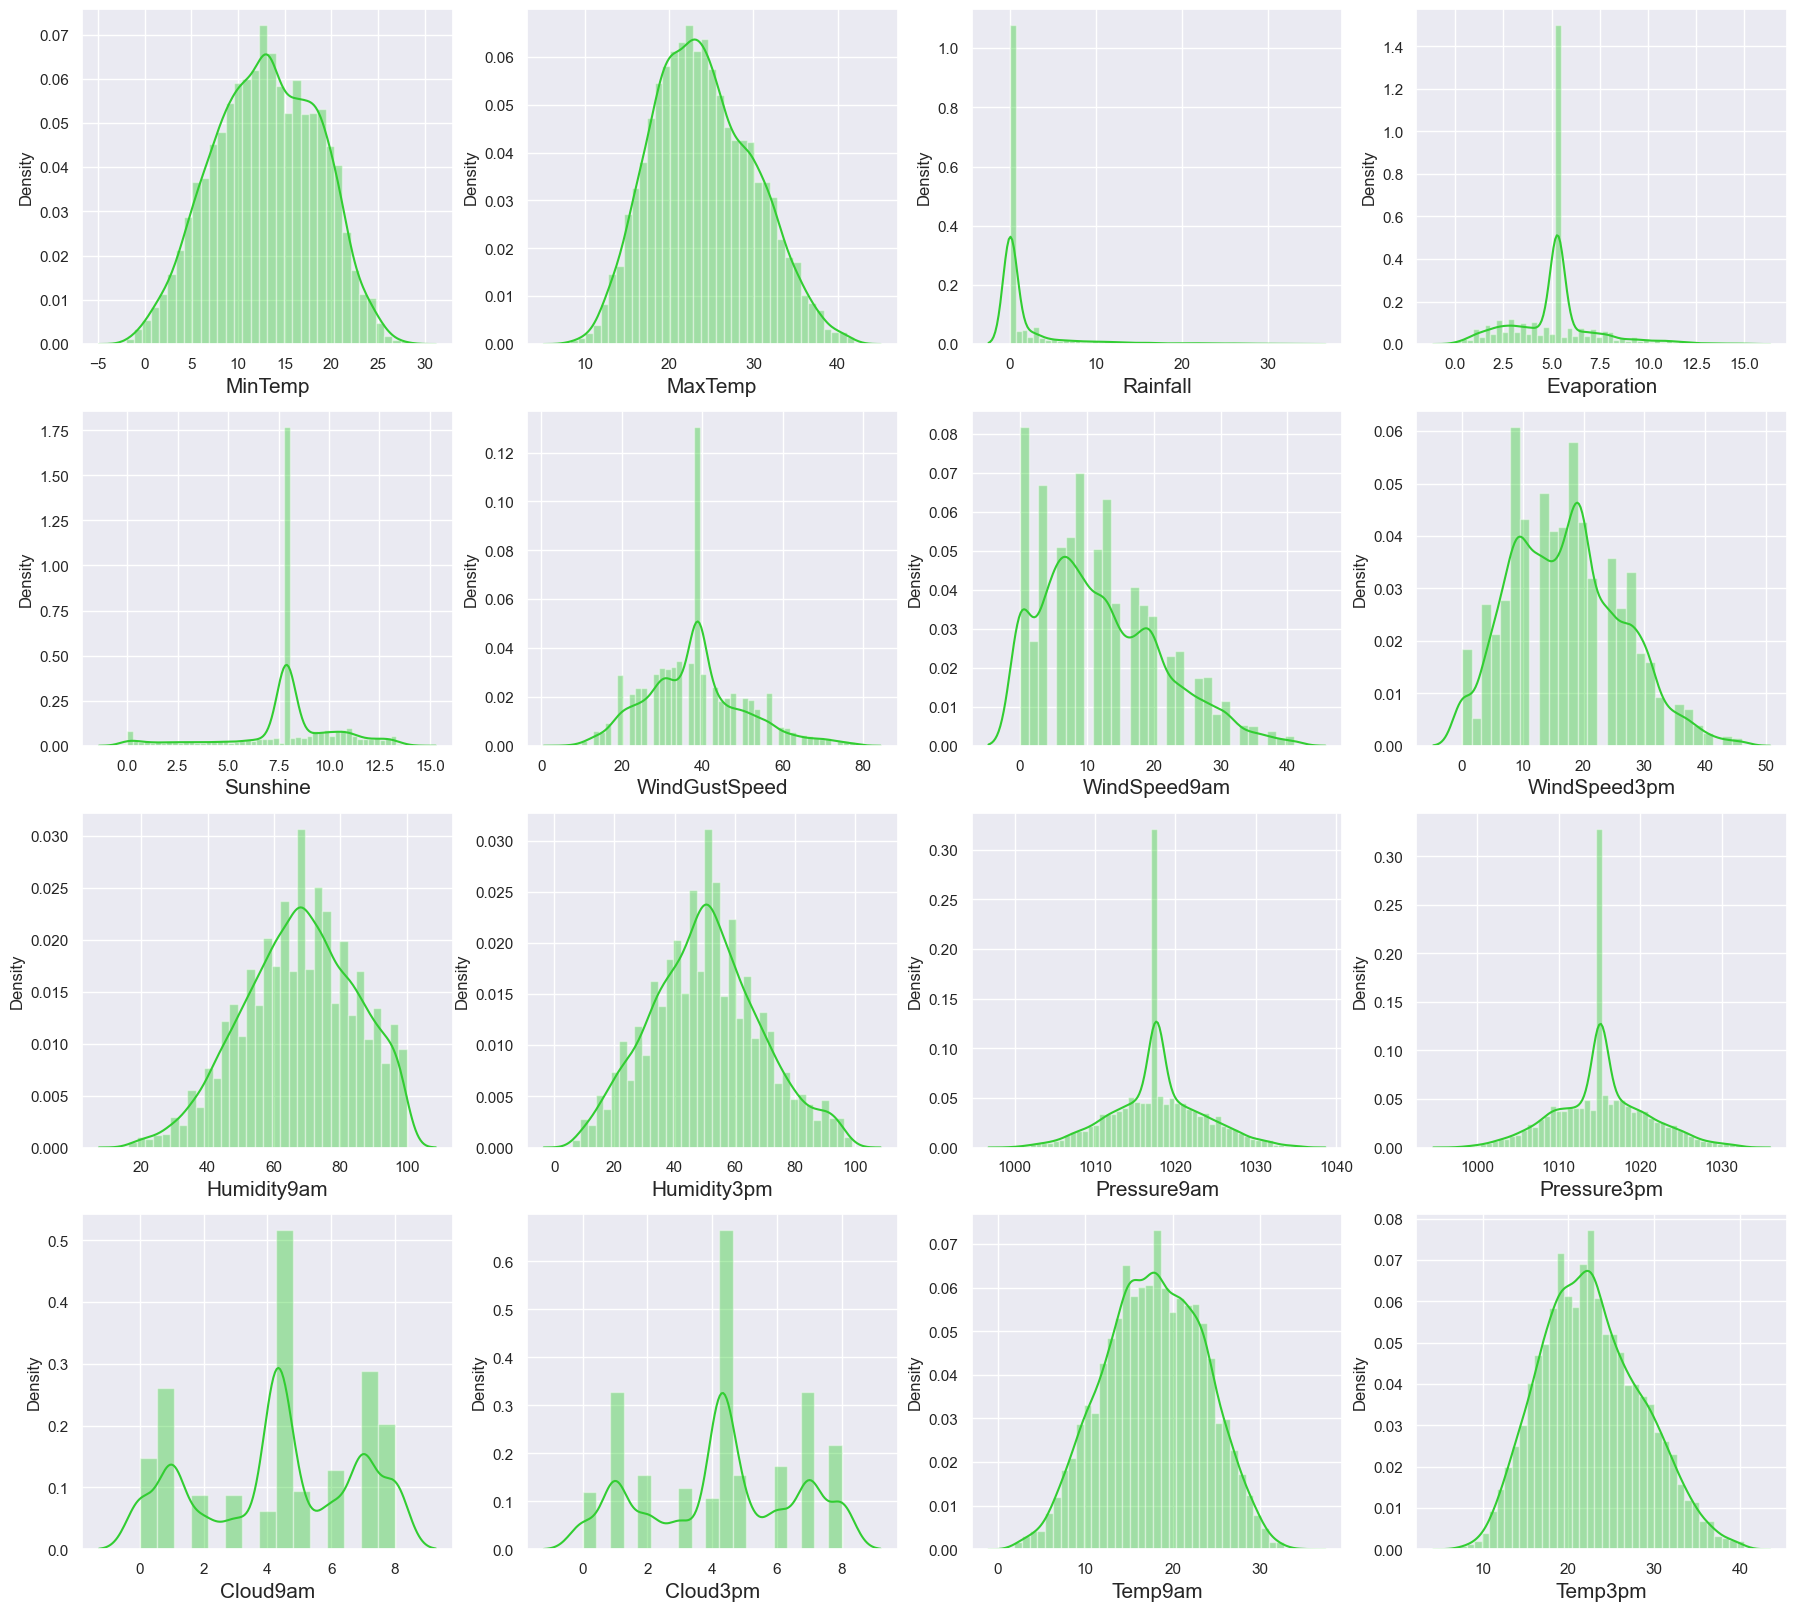

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.178714
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

In [23]:
pt.figure(figsize=(22,20))
p=1
for i in float_cols:
    if p<=16:
        ax=pt.subplot(4,4,p)
        sb.distplot(df1[i],  color="limegreen", kde= True)
        pt.xlabel(i,fontsize=15)
    p+=1
pt.show()
df1.skew()

From above details we see that there is no much skewness present in the data except the rainfall column so we will remove skewness in that column as it is not our target variable for now.



In [24]:
df2=df1.copy() 
df2['Rainfall']=np.log1p(df2['Rainfall'])

# Standard Scaling


We will be importing the standardscaler and splitting the dataset into two variables first



In [25]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=df2.drop(['RainTomorrow'],axis=1)
y=df2['RainTomorrow']

In [26]:
#scaling
x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.069172,-0.190821,-0.025691,0.088552,-0.017794,1.248562,0.483303,1.317076,1.373685,0.867217,0.756780,0.199610,-1.559588,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675
1,-1.013829,0.174339,-0.564612,0.088552,-0.017794,1.457373,0.483303,-0.222676,1.596977,-0.908710,0.536178,-1.395627,-1.394797,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675
2,-0.021078,0.273928,-0.564612,0.088552,-0.017794,1.666183,0.646634,1.317076,1.596977,0.756221,0.977382,-1.750124,-1.120144,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675
3,-0.688929,0.655685,-0.564612,0.088552,-0.017794,-0.630732,-1.149999,0.437218,-1.752399,-0.131742,-0.897735,-1.336544,-1.889171,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675
4,0.809223,1.369406,0.230173,0.088552,-0.017794,1.248562,0.238308,-1.322499,-0.189357,-0.575724,0.315576,0.849521,-0.955352,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675


# Checking for VIF`


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,MinTemp,8.941435
1,MaxTemp,26.263923
2,Rainfall,4.692461
3,Evaporation,1.605534
4,Sunshine,1.998670
5,WindGustDir,1.609371
6,WindGustSpeed,2.182500
7,WindDir9am,1.329975
8,WindDir3pm,1.462622
9,WindSpeed9am,1.962692


After many hit and trial methods we came to know that we have to drop three columns so that every VIF value comes under the acceptance range. Those three columns are Pressure9am,Temp3pm and Temp9am.

In [28]:
x.drop(['Pressure9am','Temp9am','Temp3pm'],axis=1,inplace=True)


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,MinTemp,4.655805
1,MaxTemp,5.625579
2,Rainfall,4.672217
3,Evaporation,1.579115
4,Sunshine,1.971889
5,WindGustDir,1.586577
6,WindGustSpeed,2.132573
7,WindDir9am,1.307475
8,WindDir3pm,1.396418
9,WindSpeed9am,1.931212


All the VIF values are below the acceotance range now.



# Balancing the data using SMOTE.


In [30]:
y.value_counts()


0.0    4979
1.0    1430
Name: RainTomorrow, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

y.value_counts()


0.0    4979
1.0    4979
Name: RainTomorrow, dtype: int64

The data is balanced now



# Model building


In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]


# Finding the best random state


In [34]:
maxAcc = 0
maxRS = 0


for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9104417670682731 on Random State: 26


So the best random state is 9



In [35]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=9)


# Every model with their metrics


In [36]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*80)

 For GaussianNB()  Accuracy score is:  0.7562248995983936

 Confusion matrix: 
 [[989 275]
 [332 894]]

 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.78      0.77      1264
         1.0       0.76      0.73      0.75      1226

    accuracy                           0.76      2490
   macro avg       0.76      0.76      0.76      2490
weighted avg       0.76      0.76      0.76      2490

Cross Validation Score= 0.7311746735813168 

********************************************************************************
 For LogisticRegression()  Accuracy score is:  0.7823293172690763

 Confusion matrix: 
 [[1004  260]
 [ 282  944]]

 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.79      1264
         1.0       0.78      0.77      0.78      1226

    accuracy                           0.78      2490
   macro avg       0.78      0.78      0.78      2490
wei

As per the results Random Forest regressor is working with the most accuracy so we will use hyperparameter tuning on it.



# Hyperparameter Tuning


In [37]:
from sklearn.model_selection import GridSearchCV
param = {'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}
gcs=GridSearchCV(RandomForestClassifier(),param,cv=5)
gcs.fit(x_train,y_train)
gcs.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}

In [38]:
fmodel=RandomForestClassifier(max_features='log2',criterion='entropy',max_depth=20)
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.96385542168674


# Roc Curve


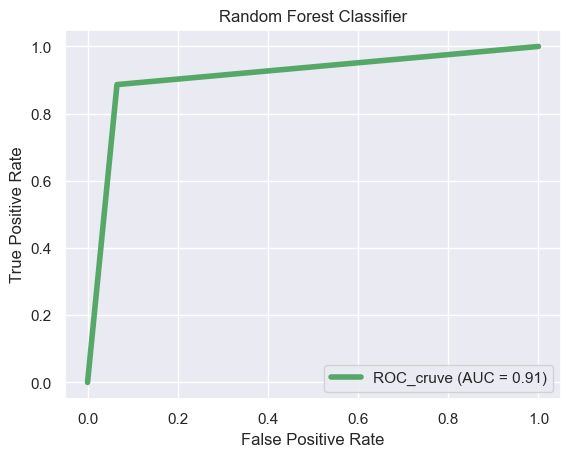

In [39]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=4,color='g')
pt.title('Random Forest Classifier')
pt.show()

# Confusion Matrix


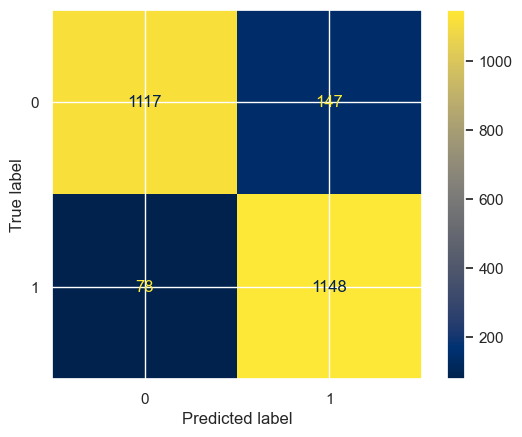

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='cividis')

# Saving the model


In [41]:
import joblib
joblib.dump(fmodel,'Rainfall_forecasting_classification.obj')

['Rainfall_forecasting_classification.obj']

# Now for regression problem


We have already removed outliers and there was no skewness present in other columns except the rainfall column which is our target variable now so we wont be removing skewness from any of the columns.

# Splitting the datatset into two variables


In [42]:
x1=df1.drop(['Rainfall'],axis=1)
y1=df1['Rainfall']

# Standard Scaling


In [43]:
x1= pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
x1.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.069172,-0.190821,0.088552,-0.017794,1.248562,0.483303,1.317076,1.373685,0.867217,0.756780,0.199610,-1.559588,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675,-0.535916
1,-1.013829,0.174339,0.088552,-0.017794,1.457373,0.483303,-0.222676,1.596977,-0.908710,0.536178,-1.395627,-1.394797,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675,-0.535916
2,-0.021078,0.273928,0.088552,-0.017794,1.666183,0.646634,1.317076,1.596977,0.756221,0.977382,-1.750124,-1.120144,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675,-0.535916
3,-0.688929,0.655685,0.088552,-0.017794,-0.630732,-1.149999,0.437218,-1.752399,-0.131742,-0.897735,-1.336544,-1.889171,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675,-0.535916
4,0.809223,1.369406,0.088552,-0.017794,1.248562,0.238308,-1.322499,-0.189357,-0.575724,0.315576,0.849521,-0.955352,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675,-0.535916


# Checking for VIF


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['vif'] = [variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif

,Features,vif
0,MinTemp,8.943609
1,MaxTemp,26.280821
2,Evaporation,1.604261
3,Sunshine,2.023313
4,WindGustDir,1.611111
5,WindGustSpeed,2.248139
6,WindDir9am,1.329372
7,WindDir3pm,1.463700
8,WindSpeed9am,1.961018
9,WindSpeed3pm,1.917223


After several hit and tries we got to know that three columns namely, Maxtemp, Temp3pm and Pressure9am had to be removed to bring all the VIF values below the acceptance range.



In [45]:
x1.drop(['MaxTemp','Temp3pm','Pressure9am','Temp9am'],axis=1,inplace=True)


In [46]:
vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['vif'] = [variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif


,Features,vif
0,MinTemp,1.569340
1,Evaporation,1.567664
2,Sunshine,1.958168
3,WindGustDir,1.585420
4,WindGustSpeed,2.189611
5,WindDir9am,1.270531
6,WindDir3pm,1.396558
7,WindSpeed9am,1.851692
8,WindSpeed3pm,1.850622
9,Humidity9am,2.453979


# Model Building


In [47]:
pip install xgboost


In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score


In [49]:
models_reg=[LinearRegression(),Ridge(),Lasso(),SVR(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]


In [50]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(xtrain,ytrain)
        pred = m.predict(xtest)
        acc = r2_score(ytest,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.5422028747969512 on Random State: 23


So the best random state is 29



In [51]:
 x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .25, random_state=29)


# Every Regression model with its metric.


In [52]:
for m in models_reg:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x1,y1,cv=5)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*75)

 For LinearRegression() 
R2 score : 0.49358846255067645
Mean absolute error:  1.5580418226170378
Mean squared error:  11.47653542634321
Cross Validation Score= 0.48907614881489775 

***************************************************************************
 For Ridge() 
R2 score : 0.49359189524359603
Mean absolute error:  1.5580639626413955
Mean squared error:  11.476457633048653
Cross Validation Score= 0.48907822446988247 

***************************************************************************
 For Lasso() 
R2 score : 0.43447386954923795
Mean absolute error:  1.6916085757748198
Mean squared error:  12.81621801772327
Cross Validation Score= 0.43903949488744576 

***************************************************************************
 For SVR() 
R2 score : 0.42327663332332643
Mean absolute error:  1.2749833440495435
Mean squared error:  13.069975029009106
Cross Validation Score= 0.4023431671100652 

***************************************************************************
 F

As per r2score and cross validation score , Random forest regressor and Gradient boosting regressor are working the best so we will be using Gradient boosting regressor for this as it has a bit high accuracy ons seen (r2 score) and unseen (cross val score) data.

# Hyperparameter Tuning


In [55]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
gcs=GridSearchCV(GradientBoostingRegressor(),param,cv=5,n_jobs=-1)
gcs.fit(x_train,y_train)
gcs.best_params_

In [ ]:
fmodel_reg=GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,min_samples_leaf= 4,
min_samples_split= 10,max_depth=3)
fmodel_reg.fit(x_train,y_train)
pred2=fmodel_reg.predict(x_test)
acc=r2_score(y_test,pred2)
print(acc*100)

# Plotting the best fit line


In [57]:
pt.scatter(x=y_test,y=pred2,color='pink')
pt.plot(y_test,y_test,color='cadetblue')
pt.title('Best Fit Line',fontsize=18)

NameError: name 'pred2' is not defined

# Saving the final model


In [ ]:
joblib.dump(fmodel_reg,'Rainfall_forecasting_reg.obj')
